<h1>Approach</h1>
<p>The approach is to calculate the adopted_user based on given condition and then use this data to identify feature importance</p>

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import datetime
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.tree as tree

In [88]:
users_df=pd.read_csv("takehome_users.csv" ,encoding = "ISO-8859-1")
users_eng_df=pd.read_csv("takehome_user_engagement.csv" ,encoding = "ISO-8859-1")

In [89]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [90]:
users_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [91]:
users_df.head()
len(users_df)

12000

In [92]:
users_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [93]:
users_eng_df.sort_values(by = 'time_stamp', inplace = True)
users_eng_df.head()

,time_stamp,user_id,visited
178140,2012-05-31 08:20:06,10012,1
59486,2012-05-31 15:47:36,3428,1
175638,2012-05-31 17:19:37,9899,1
26821,2012-05-31 21:58:33,1693,1
109716,2012-06-01 00:17:30,6102,1


In [94]:
users_eng_df['time_stamp']=pd.to_datetime(users_eng_df['time_stamp'])
users_eng_df.head()

,time_stamp,user_id,visited
178140,2012-05-31 08:20:06,10012,1
59486,2012-05-31 15:47:36,3428,1
175638,2012-05-31 17:19:37,9899,1
26821,2012-05-31 21:58:33,1693,1
109716,2012-06-01 00:17:30,6102,1


In [96]:
users_eng_df['week_of_year'] =users_eng_df.time_stamp.apply(lambda x: x.weekofyear)

In [97]:
final_result_df=users_eng_df.groupby(['user_id','week_of_year']).sum().reset_index()

In [98]:
final_result_df['adopted_user']=[1 if x>=3 else 0 for x in final_result_df['visited']]


In [99]:
df=final_result_df[final_result_df['adopted_user']==1]


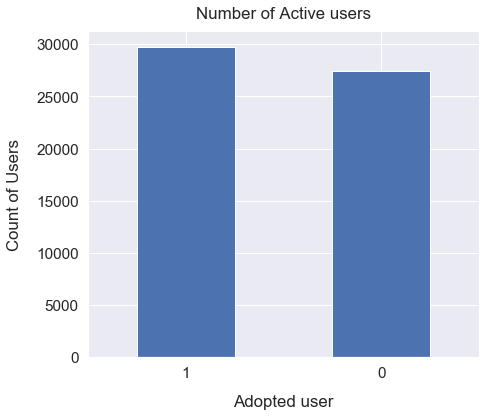

In [100]:
sns.set(font_scale=1.4)
final_result_df['adopted_user'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Adopted user", labelpad=14)
plt.ylabel("Count of Users", labelpad=14)
plt.title("Number of Active users", y=1.02);

In [104]:
users_df = users_df.rename({"object_id":"user_id"}, axis=1)

In [111]:
df_ap=final_result_df[['user_id','adopted_user']]
test_ap=df_ap[df_ap['adopted_user']==1]
df5=pd.DataFrame(list(set(test_ap['user_id'])))
df5['adopted_user']=1
df5.columns=['user_id','adopted_user']
df5.head()

,user_id,adopted_user
0,8192,1
1,2,1
2,8196,1
3,10,1
4,20,1


In [112]:
merged_df = users_df.merge(df5, on="user_id", how="left")

In [113]:
merged_df['adopted_user'].fillna(0,inplace=True)
merged_df['invited_by_user_id'].fillna(0,inplace=True)

In [114]:
merged_df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0


In [115]:
X_train, Xtest, y_train, ytest = train_test_split(merged_df[["invited_by_user_id","enabled_for_marketing_drip","opted_in_to_mailing_list"]].values,merged_df["adopted_user"].values,random_state=5)
y_train=y_train.astype('int')
ytest=ytest.astype('int')

In [116]:
tree_para = {'n_estimators':[50, 75, 100],'max_depth':[3,5,7]}
clf1 = GridSearchCV(RandomForestClassifier(), tree_para, cv=5)
clf1.fit(X_train, y_train)
dt_model1 = clf1.best_estimator_
print(dt_model1.score(X_train, y_train))


0.8817777777777778


In [117]:
pred_test=dt_model1.predict(Xtest)

In [118]:
print(accuracy_score(ytest,pred_test))

0.873


In [119]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [120]:
importances = forest.feature_importances_

In [121]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 0 (0.997072)
2. feature 2 (0.001745)
3. feature 1 (0.001184)


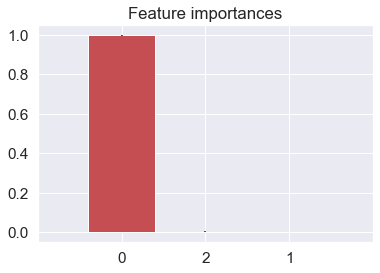

In [122]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<h1>Conclusion:</h1>
<p>The accuracy of the model is 0.873</p>